In [2]:
# Turkiye Student Evaluation

# ---------- Used libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


import collections
from collections import Counter as count

# ---------------- Data PreProcessing ----------------------------
dataSet = pd.read_csv('turkiye-student-evaluation_generic.csv')
# information about the dataset
dataSet.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
dataSet.info()
print("\n\t data dimensions:", dataSet.shape)
print("\nnull values in data:\n", dataSet.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [4]:
dataSet.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
questions = dataSet.iloc[:, 5:25]
quenstionsMeans = questions.mean(axis = 0)
print(quenstionsMeans)

totalMean = quenstionsMeans.mean()
print(totalMean)

Q1     2.929897
Q2     3.073883
Q3     3.178694
Q4     3.082474
Q5     3.105842
Q6     3.107388
Q7     3.066323
Q8     3.041924
Q9     3.165979
Q10    3.090722
Q11    3.183849
Q12    3.035567
Q13    3.242784
Q14    3.290893
Q15    3.287285
Q16    3.169588
Q17    3.398454
Q18    3.222509
Q19    3.261684
Q20    3.285395
dtype: float64
3.1610567010309283


In [6]:
print(questions)
questions = questions.replace([ 1, 2, 3], False).replace([4, 5], True)
print(questions)

      Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  \
0      3   3   3   3   3   3   3   3   3    3    3    3    3    3    3    3   
1      3   3   3   3   3   3   3   3   3    3    3    3    3    3    3    3   
2      5   5   5   5   5   5   5   5   5    5    5    5    5    5    5    5   
3      3   3   3   3   3   3   3   3   3    3    3    3    3    3    3    3   
4      1   1   1   1   1   1   1   1   1    1    1    1    1    1    1    1   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
5815   1   1   1   1   1   1   1   1   1    1    1    1    1    1    1    1   
5816   4   4   4   4   4   4   4   4   4    4    4    5    5    5    5    5   
5817   5   5   5   5   5   5   5   5   5    5    5    5    5    5    5    5   
5818   1   1   1   1   1   1   1   1   1    1    1    1    1    1    1    1   
5819   1   1   1   1   1   1   1   1   1    1    1    1    1    1    1    1   

      Q17  Q18  Q19  Q20  
0       3    3    3    3

In [7]:
# ---------------- APRIORI ---------------------------------------  
timer_start = time.perf_counter()

frequent_itemsets = apriori(questions, min_support = 0.43, use_colnames = True)

timer_end = time.perf_counter() 
print(f"\n Apriori done in {timer_end - timer_start:0.4f} seconds")

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

print(frequent_itemsets.to_string())

print("SORTED")
frequent_itemsets_sorted = frequent_itemsets.sort_values('support',  ascending=False)
print(frequent_itemsets_sorted)


 Apriori done in 0.0180 seconds
     support         itemsets  length
0   0.435739             (Q3)       1
1   0.440722            (Q11)       1
2   0.464777            (Q13)       1
3   0.485052            (Q14)       1
4   0.480756            (Q15)       1
5   0.435223            (Q16)       1
6   0.530069            (Q17)       1
7   0.455842            (Q18)       1
8   0.467182            (Q19)       1
9   0.477320            (Q20)       1
10  0.446220       (Q13, Q14)       2
11  0.436942       (Q13, Q15)       2
12  0.441581       (Q13, Q17)       2
13  0.451890       (Q14, Q15)       2
14  0.460825       (Q14, Q17)       2
15  0.432302       (Q19, Q14)       2
16  0.439003       (Q14, Q20)       2
17  0.459278       (Q17, Q15)       2
18  0.430069       (Q19, Q15)       2
19  0.437113       (Q20, Q15)       2
20  0.440893       (Q18, Q17)       2
21  0.447423       (Q19, Q17)       2
22  0.455155       (Q17, Q20)       2
23  0.436598       (Q19, Q20)       2
24  0.430241  (Q1

In [8]:
# ---------------- FP-GROWTH ---------------------------------------  
timer_start = time.perf_counter()

frequent_itemsets2 = fpgrowth(questions, min_support = 0.4, use_colnames = True)
timer_end = time.perf_counter() 
print(f"\n FP-Growth done in {timer_end - timer_start:0.4f} seconds")

frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets2)

print("SORTED")
frequent_itemsets2_sorted = frequent_itemsets2.sort_values('support',  ascending=False)
print(frequent_itemsets2_sorted)


 FP-Growth done in 0.1189 seconds
      support         itemsets  length
0    0.530069            (Q17)       1
1    0.485052            (Q14)       1
2    0.480756            (Q15)       1
3    0.477320            (Q20)       1
4    0.467182            (Q19)       1
..        ...              ...     ...
106  0.403952  (Q16, Q14, Q17)       3
107  0.402062  (Q16, Q18, Q17)       3
108  0.401890  (Q13, Q14, Q16)       3
109  0.400515  (Q13, Q16, Q15)       3
110  0.401203  (Q16, Q17, Q20)       3

[111 rows x 3 columns]
SORTED
      support                   itemsets  length
0    0.530069                      (Q17)       1
1    0.485052                      (Q14)       1
2    0.480756                      (Q15)       1
3    0.477320                      (Q20)       1
4    0.467182                      (Q19)       1
..        ...                        ...     ...
91   0.400687            (Q19, Q18, Q13)       3
86   0.400515       (Q19, Q18, Q17, Q15)       4
109  0.400515            

In [9]:
# ---------------- ECLAT ---------------------------------------  
timer_start = time.perf_counter()

eclat_rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.4)[['antecedents', 'consequents', 'support','confidence', 'lift']]

timer_end = time.perf_counter() 
print(f"\n ECLAT (apr) done in {timer_end - timer_start:0.4f} seconds")

eclat_rules['length'] = eclat_rules['consequents'].apply(lambda x: len(x))
print(eclat_rules)

print("SORTED")
frequent_itemsets2_sorted = frequent_itemsets.sort_values('support',  ascending=False)
print(frequent_itemsets2_sorted)

print(eclat_rules.to_string())


 ECLAT (apr) done in 0.0093 seconds
   antecedents consequents   support  confidence      lift  length
0        (Q13)       (Q14)  0.446220    0.960074  1.979324       1
1        (Q14)       (Q13)  0.446220    0.919943  1.979324       1
2        (Q13)       (Q15)  0.436942    0.940111  1.955484       1
3        (Q15)       (Q13)  0.436942    0.908863  1.955484       1
4        (Q13)       (Q17)  0.441581    0.950092  1.792395       1
5        (Q17)       (Q13)  0.441581    0.833063  1.792395       1
6        (Q14)       (Q15)  0.451890    0.931633  1.937850       1
7        (Q15)       (Q14)  0.451890    0.939957  1.937850       1
8        (Q14)       (Q17)  0.460825    0.950053  1.792321       1
9        (Q17)       (Q14)  0.460825    0.869368  1.792321       1
10       (Q19)       (Q14)  0.432302    0.925340  1.907715       1
11       (Q14)       (Q19)  0.432302    0.891250  1.907715       1
12       (Q14)       (Q20)  0.439003    0.905066  1.896142       1
13       (Q20)       (Q14

In [10]:
# ---------------- ECLAT (cont.)----------------------------------  
timer_start = time.perf_counter()

eclat_rules = association_rules(frequent_itemsets2, metric="support", min_threshold=0.4)[['antecedents', 'consequents', 'support','confidence', 'lift']]

timer_end = time.perf_counter() 
print(f"\n ECLAT (fp) done in {timer_end - timer_start:0.4f} seconds")

eclat_rules['length'] = eclat_rules['consequents'].apply(lambda x: len(x))

print(eclat_rules)
print(eclat_rules.to_string())


 ECLAT (fp) done in 0.0248 seconds
    antecedents consequents   support  confidence      lift  length
0         (Q14)       (Q17)  0.460825    0.950053  1.792321       1
1         (Q17)       (Q14)  0.460825    0.869368  1.792321       1
2         (Q17)       (Q15)  0.459278    0.866451  1.802267       1
3         (Q15)       (Q17)  0.459278    0.955325  1.802267       1
4         (Q14)       (Q15)  0.451890    0.931633  1.937850       1
..          ...         ...       ...         ...       ...     ...
675  (Q16, Q20)       (Q17)  0.401203    0.981092  1.850878       1
676  (Q17, Q20)       (Q16)  0.401203    0.881465  2.025316       1
677       (Q16)  (Q17, Q20)  0.401203    0.921832  2.025316       2
678       (Q17)  (Q16, Q20)  0.401203    0.756888  1.850878       2
679       (Q20)  (Q16, Q17)  0.401203    0.840533  2.006522       2

[680 rows x 6 columns]
              antecedents           consequents   support  confidence      lift  length
0                   (Q14)           

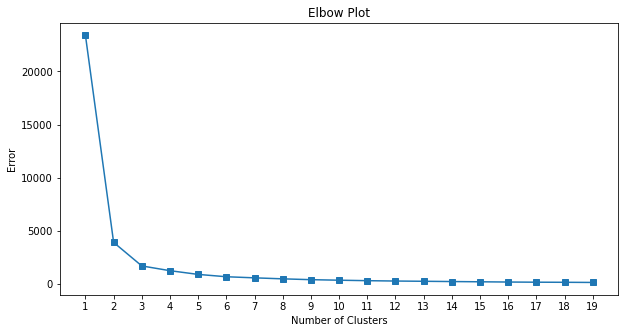

In [11]:
# ----------------  K-MEANS (cluster analysis)-------------------------------  
#from sklearn.cluster import KMeans
pca = PCA(n_components = 2, random_state = 1)
qPca = pca.fit_transform(questions)

clusterRange = range(1, 20)
clusterErrors = []

for numClusters in clusterRange:
    clusters = KMeans(numClusters, random_state = 42)
    clusters.fit(qPca)
    clusterErrors.append(clusters.inertia_)
    
plt.figure(figsize = (10, 5))
plt.plot(clusterRange, clusterErrors, marker = "s" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(clusterRange)
plt.show()


 K-MEANS done in 0.1294 seconds


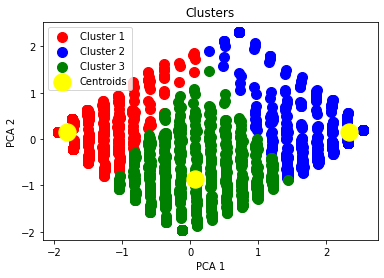

Counter({0: 2809, 1: 2147, 2: 864})

In [12]:
# ----------------  K-MEANS (continued) -------------------------------  
timer_start = time.perf_counter()

kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(qPca)

timer_end = time.perf_counter() 
print(f"\n K-MEANS done in {timer_end - timer_start:0.4f} seconds")

plt.scatter(qPca[y_kmeans == 0, 0], qPca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(qPca[y_kmeans == 1, 0], qPca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(qPca[y_kmeans == 2, 0], qPca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

count(y_kmeans)

In [13]:
name = "k-means++"
y = dataSet.instr
kmeans.fit(qPca)

print('homogeneity: %.3f \tcompleteness: %.3f \tv-measure: %.3f \tsilhouette: %.3f'
% (metrics.homogeneity_score(y, kmeans.labels_),
metrics.completeness_score(y, kmeans.labels_),
metrics.v_measure_score(y, kmeans.labels_),
metrics.silhouette_score(qPca, kmeans.labels_,
metric='euclidean'))) 

homogeneity: 0.014 	completeness: 0.012 	v-measure: 0.013 	silhouette: 0.769


In [14]:
# ----------------  AGNES (cluster analysis)---------------------------------------  
#import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(questions, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Questions')
plt.ylabel('Euclidean distances')
plt.show()

KeyboardInterrupt: 

In [ ]:
# ----------------  AGNES (continued) ---------------------------------------  
#from sklearn.cluster import AgglomerativeClustering
timer_start = time.perf_counter()

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(questions)

timer_end = time.perf_counter() 
print(f"\n AGNES done in {timer_end - timer_start:0.4f} seconds")

# Visualising the clusters
plt.scatter(qPca[y_hc == 0, 0], qPca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(qPca[y_hc == 1, 0], qPca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(qPca[y_hc == 2, 0], qPca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

count(y_hc)
collections.Counter(y_hc)

In [ ]:
y = dataSet.instr
hc.fit(qPca)

print('homogeneity: %.3f \tcompleteness: %.3f \tv-measure: %.3f \tsilhouette: %.3f'
% (metrics.homogeneity_score(y, hc.labels_),
metrics.completeness_score(y, hc.labels_),
metrics.v_measure_score(y, hc.labels_),
metrics.silhouette_score(qPca, hc.labels_,
metric='euclidean'))) 


 DBSCAN done in 0.3291 seconds
number of clusters:  2
Counter({0: 5729, -1: 91})
unclustered percentage:  0.01563573883161512


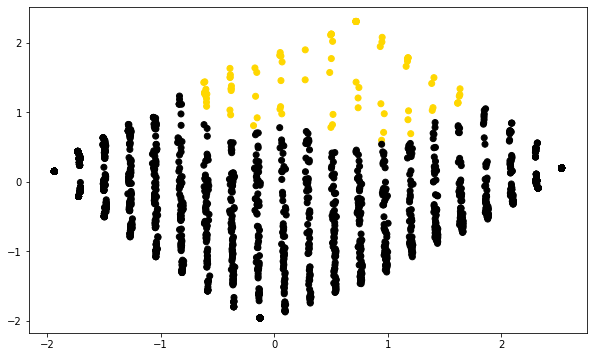

In [18]:
# ---------------- DBSCAN ---------------------------------------  
#from sklearn.cluster import DBSCAN
timer_start = time.perf_counter()

model = DBSCAN(eps = 0.5, min_samples = 80)

model.fit(qPca)

timer_end = time.perf_counter() 
print(f"\n DBSCAN done in {timer_end - timer_start:0.4f} seconds")

clusters2 = model.labels_
colors = ['black', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'gold']
vectorizer = np.vectorize(lambda x : colors[x%len(colors)])

plt.figure(figsize = (10,6))
plt.scatter(qPca[:, 0], qPca[:, 1], c = vectorizer(clusters2))
counts = collections.Counter(clusters2)
print("number of clusters: ", len(counts))
print(counts)
print("unclustered percentage: ", counts[-1]/5820)

In [16]:
y = dataSet.instr
model.fit(qPca)

print('homogeneity: %.3f \tcompleteness: %.3f \tv-measure: %.3f \tsilhouette: %.3f'
% (metrics.homogeneity_score(y, model.labels_),
metrics.completeness_score(y, model.labels_),
metrics.v_measure_score(y, model.labels_),
metrics.silhouette_score(qPca, model.labels_,
metric='euclidean'))) 

homogeneity: 0.015 	completeness: 0.014 	v-measure: 0.014 	silhouette: 0.659
